# Import the necessary libraries        

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
import os

In [2]:
os.getcwd()                                     #Get the current working directory

'C:\\Users\\Admin\\#TSF#DSBA'

In [3]:
sample = pd.read_csv("C:/Users/Admin/Downloads/Task3Dataset.csv")    #Read the csv file
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
sample.head()                                        #Print the first five rows.. 

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
sample.describe()                          #Get the basic statistic of the data

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
# As we know already even the data tells that the attribute 'Postal Code' is of no use
sample.drop('Postal Code', axis = 1, inplace=True)  #REmovinf the column Postal Code

In [7]:
sample.head()               #No postal Code!

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


[]

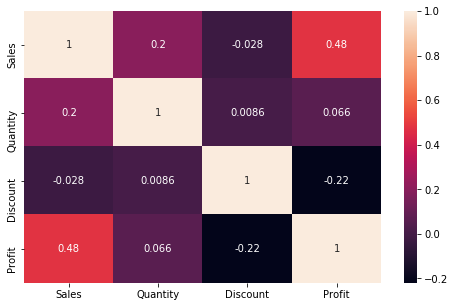

In [8]:
# Visualize the the correlation coefficient

plt.figure(figsize =(8,5))
sb.heatmap(sample.corr(),annot = True)
plt.plot()

In [9]:
sample.shape                                     #Print the shape of the data(Row,Column)

(9994, 12)

In [10]:
sample.columns                                      #Col. names

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [11]:
#Running a for loop to get extracted the value counts of the each of the feature(especially Categorical)

for i in range(0,12):
    s=sample[sample.columns[i]].value_counts()
    print(sample.columns[i],'\n',s,'\n')

Ship Mode 
 Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64 

Segment 
 Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64 

Country 
 United States    9994
Name: Country, dtype: int64 

City 
 New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Santa Maria        1
Abilene            1
Murrieta           1
Ontario            1
Chapel Hill        1
Name: City, Length: 531, dtype: int64 

State 
 California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado  

In [12]:
#Correlation Analysis
sample.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


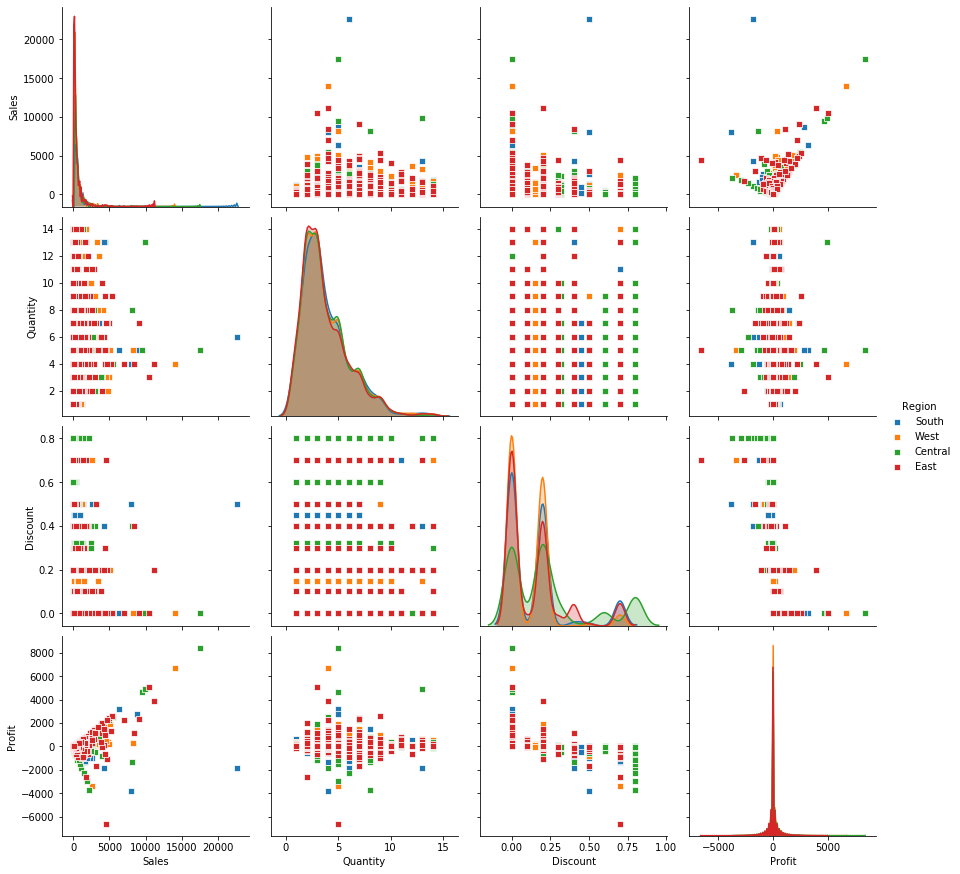

In [13]:
#Obtaining Pairplot to have a check on the relationship between the variables(numerical)

sb.pairplot(sample,hue='Region',markers='s',size=3)

## Some Insights from the pair plot:-
   ### Inc.^ in Sales results to inc^ in the profit margin.
   ### ->Postal codes are assigned region-wise (As there is no overlap in colors)
  ### ->More discount leads to more loss in revenue!
  ### ->After the sales cross 10k, the company stopped bearing losses!(Important Insight)

(array([1620.,    0.,    0., 3203.,    0.,    0., 2323.,    0.,    0.,
        2848.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

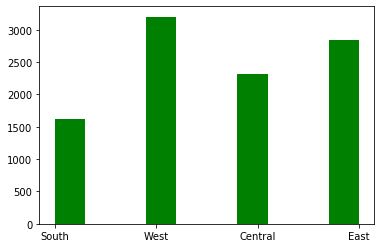

In [14]:
plt.hist(x ='Region',data=sample, color= 'Green')

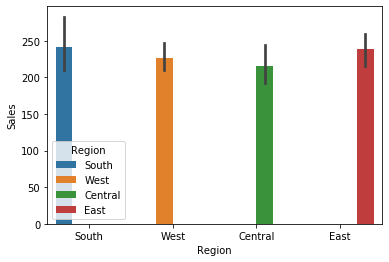

In [15]:
sb.barplot(x = 'Region', y = 'Sales' , hue = 'Region' ,data = sample)

In [16]:
# Even after supplying more in West, the sales are inc^ in the East! 

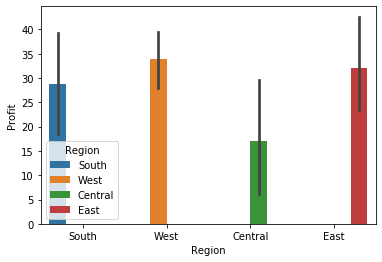

In [17]:
sb.barplot(x = 'Region', y = 'Profit' , hue = 'Region' ,data = sample)  #Region-Wise Profit

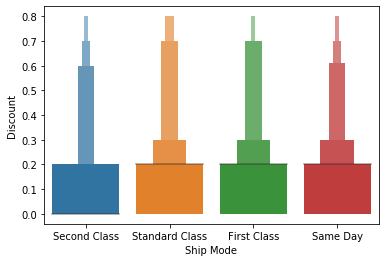

In [18]:
sb.boxenplot( x = sample['Ship Mode'], y = sample['Discount'])   
#Checking whether any particular shipmode is getting any special discount

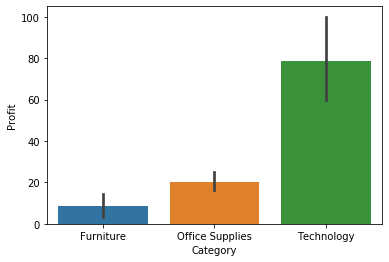

In [19]:
sb.barplot( x = sample['Category'], y = sample['Profit'])
#Category Wise Profit

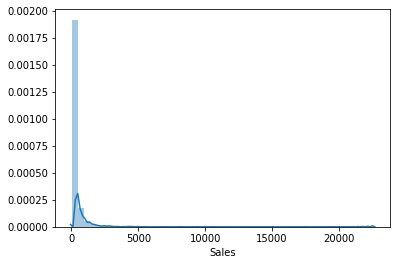

In [20]:
sb.distplot(sample['Sales'])
#Distribution Of Sales

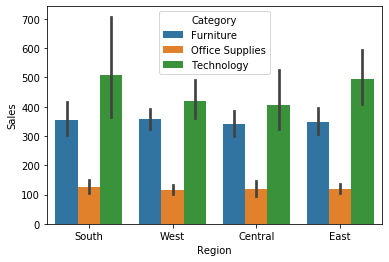

In [21]:
sb.barplot(x = 'Region', y = 'Sales' , hue = 'Category' ,data = sample)

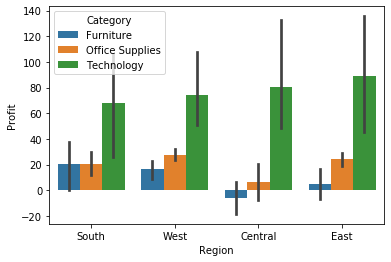

In [22]:
#Showing region-wise profit, distributed among category
sb.barplot(x = 'Region', y = 'Profit' , hue = 'Category' ,data = sample)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


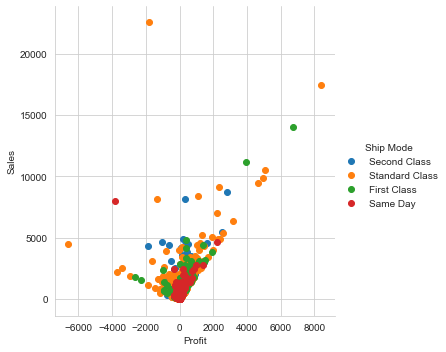

In [23]:
# Scatter plot of profit by Sales, Filtered by Ship-Mode
sb.set_style('whitegrid')
sb.FacetGrid(data = sample, hue='Ship Mode', size=5)\
            .map(plt.scatter,'Profit', 'Sales' )\
            .add_legend();
plt.show();

In [24]:
# The goods ship on Same day, has no profit no loss like situation...
# Standard class Shipment sometimes experience the extreme condition(High profit/loss)

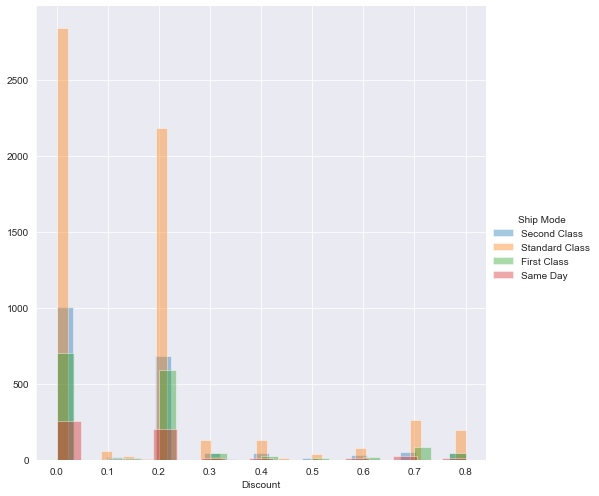

In [25]:
sb.set_style('darkgrid')
sb.FacetGrid(sample, hue = 'Ship Mode', size = 7)\
.map(sb.distplot, 'Discount', kde= False)\
.add_legend();
plt.show();                                      #Distribution of Discount, filtered by the Ship-Mode 

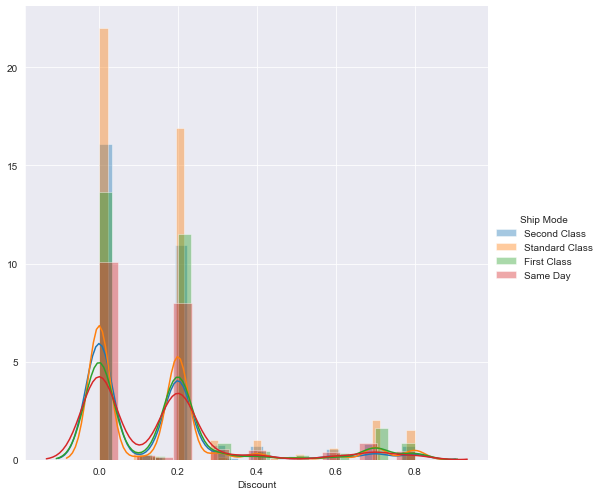

In [26]:
sb.set_style('darkgrid')
sb.FacetGrid(sample, hue = 'Ship Mode', size = 7)\
.map(sb.distplot, 'Discount')\
.add_legend();
plt.show();                     #Distribution of Discount, filtered by the Ship-Mode(With curve)

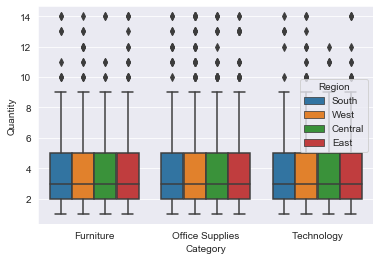

In [27]:
sb.boxplot( x = sample['Category'], y = sample['Quantity'], hue = sample['Region'])
#Category-Wise Quantity supplied, Filtered by Region

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


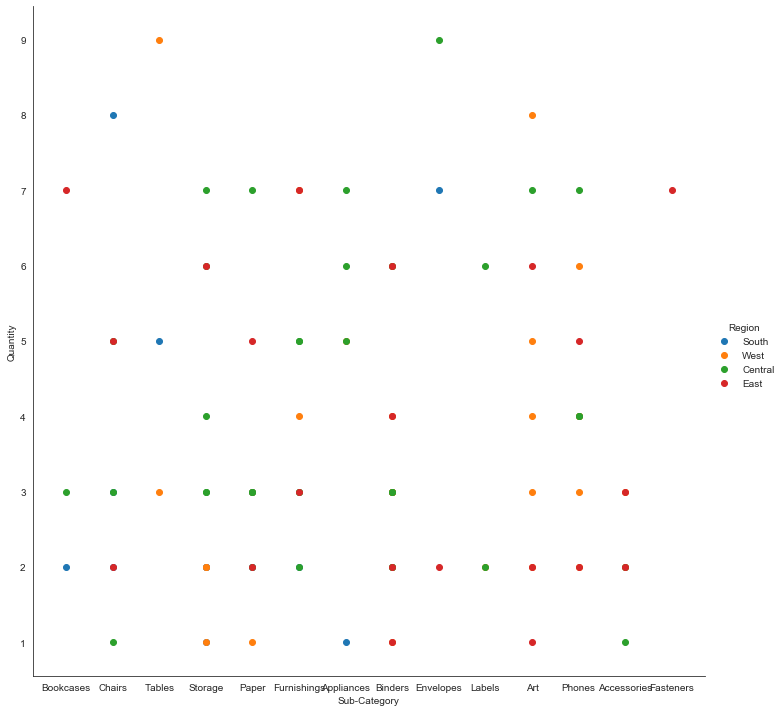

In [28]:
sb.set_style('white')
sb.FacetGrid(data = sample.iloc[:100,:], hue='Region', size=10)\
            .map(plt.scatter,'Sub-Category','Quantity' )\
            .add_legend();
plt.show();                    #Scatter plot distributed region-wise(Top 100)